<a href="https://colab.research.google.com/github/LuizQuinelato96/Coursera_Capstone/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries

In [103]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Folium installed
Libraries imported.


## Credentials


In [104]:
CLIENT_ID = 'MESKSCRJYRPZ0SRI1YQWEV0AHFIMEV0THHQ0J0DQSUPXMEGQ' # your Foursquare ID
CLIENT_SECRET = 'VCU0HKNZ0XAKDMSXTG5PG1AKUYOUUSG4SO45A3AAWEWGTDQT' # your Foursquare Secret
VERSION = '20200803'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MESKSCRJYRPZ0SRI1YQWEV0AHFIMEV0THHQ0J0DQSUPXMEGQ
CLIENT_SECRET:VCU0HKNZ0XAKDMSXTG5PG1AKUYOUUSG4SO45A3AAWEWGTDQT


## Get Data
Here we're going to get data about some most popular venues around Paris. To make sure that we got differents venues I choosed some specifics places to startpoint

## Get data from 17º arrondissement de Paris

In [ ]:
address = '11º arr., França'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

radius = 4000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
#'There are {} around Paris with radius equal to {}m'.format(len(results['response']['groups'][0]['items']),radius)
items = results['response']['groups'][0]['items']

dataframe = json_normalize(items) # flatten JSON

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(5)
data = dataframe_filtered[['name',	'categories',	'address',	'lat',	'lng']]


48.8870221 2.3478318


KeyError: ignored

In [105]:
address = '11º arr., França'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

radius = 4000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
#'There are {} around Paris with radius equal to {}m'.format(len(results['response']['groups'][0]['items']),radius)
items = results['response']['groups'][0]['items']
items
dataframe = json_normalize(items) # flatten JSON


48.8870221 2.3478318


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


In [106]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(5)
data = dataframe_filtered[['name',	'categories',	'address',	'lat',	'lng']]


#### Getting another venues

In [107]:
add = ['1.º arrondissement de Paris','2º arr., França','Necker,Paris',"Place d'Italie,Paris",'Place le la Concorde,Paris',"Folie-Méricourt,Paris"]
#'19º arrondissement de Paris',
for address in add:
 geolocator = Nominatim(user_agent="foursquare_agent")
 location = geolocator.geocode(address)
 latitude = location.latitude
 longitude = location.longitude
 print(latitude, longitude)
 
 radius = 4000
 url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
 import requests
 results = requests.get(url).json()
 'There are {} around Paris with radius equal to {}m'.format(len(results['response']['groups'][0]['items']),radius)
 items = results['response']['groups'][0]['items']
 
 dataframe = json_normalize(items) # flatten JSON

 # filter columns
 filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
 dataframe_filtered = dataframe.loc[:, filtered_columns]
 
 # filter the category for each row
 dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)
 
 # clean columns
 dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]
 
 #dataframe_filtered.head(5)
 data4 = dataframe_filtered[['name',	'categories',	'address',	'lat',	'lng']]
 data = data.append(data4)
  


48.8199323 2.3645735


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


48.8870221 2.3478318
48.84196595 2.3129087249139717
48.8308786 2.3558807
48.8662052 2.3223767
48.867379549999995 2.3734230412220754


In [108]:
data


,name,categories,address,lat,lng
0,Hardware Société,Breakfast Spot,10 rue Lamarck,48.886901,2.344463
1,Le Myrha,Vegetarian / Vegan Restaurant,70 rue Myrha,48.886815,2.350892
2,Dôme de la Basilique du Sacré-Cœur,Scenic Lookout,Basilique du Sacré-Cœur,48.886809,2.343006
3,Babalou,Italian Restaurant,4 rue Lamarck,48.886490,2.344063
4,Comestibles & Marchand de Vins,Wine Bar,65 rue du Mont-Cenis,48.891257,2.343750
...,...,...,...,...,...
25,Atelier des Lumières,Art Museum,38 rue Saint-Maur,48.861659,2.380911
26,0fr.,Bookstore,20 rue Dupetit-Thouars,48.865746,2.361236
27,Le Mary Céleste,Cocktail Bar,1 rue Commines,48.861742,2.365012
28,Du Pain et des Idées,Bakery,34 rue Yves Toudic,48.871293,2.362744


### Frenquency of Categories

In [87]:
data['categories'].value_counts()

French Restaurant                16
Hotel                            14
Italian Restaurant               11
Plaza                             9
Bakery                            8
Vietnamese Restaurant             7
Park                              7
Bookstore                         6
Coffee Shop                       6
Wine Bar                          6
Vegetarian / Vegan Restaurant     5
Bar                               5
Garden                            5
Historic Site                     4
Restaurant                        4
Art Museum                        4
Cocktail Bar                      4
Burger Joint                      3
Scenic Lookout                    3
Indie Movie Theater               3
Beer Bar                          3
Japanese Restaurant               3
Café                              3
Taco Place                        2
Corsican Restaurant               2
Boutique                          2
Bistro                            2
Supermarket                 

### Define the Bounding for plot the map


In [88]:
BBox = data.lat.min(),data.lng.max(),data.lat.min(), data.lng.max()
BBox

(48.808681, 2.380911111831665, 48.808681, 2.380911111831665)

### Import shape 

In [92]:
from google.colab import files
uploaded = files.upload()

Saving paris_map.png to paris_map (1).png


In [93]:
import io
ruh_m = plt.imread(io.BytesIO(uploaded['paris_map.png']))

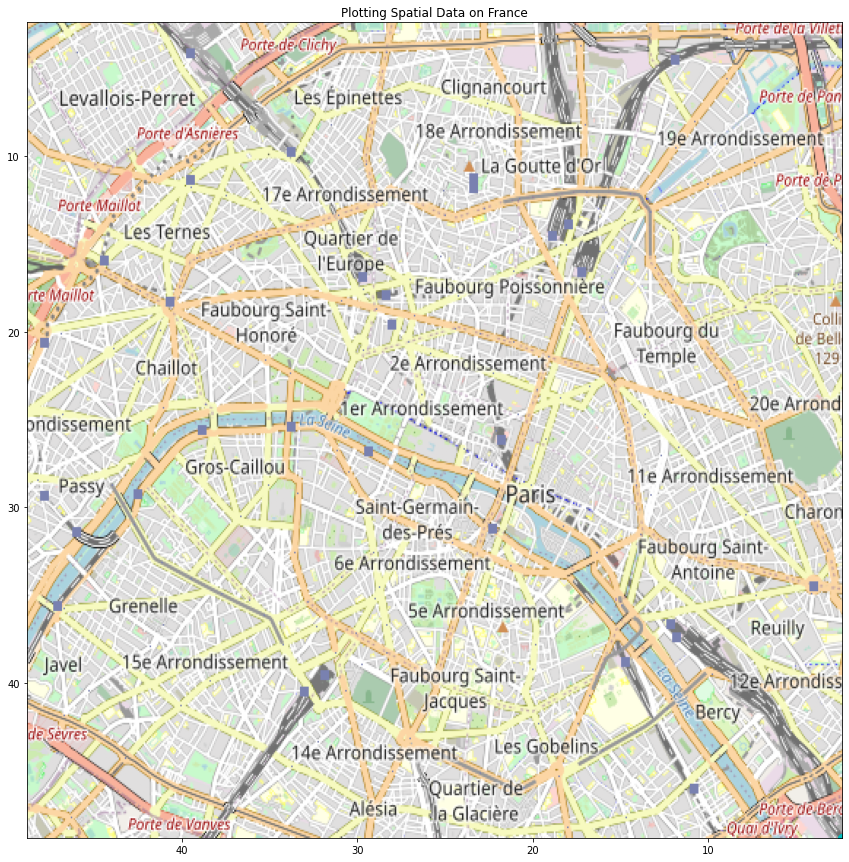

In [97]:
fig, ax = plt.subplots(figsize = (25,15))
ax.scatter(data.lng, data.lat, zorder=1, alpha= 1, c='c', s=50)
ax.set_title('Plotting Spatial Data on France')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

### Analysis of Cluster
 Analysis of Cluster is a method of statistics also call unsupervised classification. We're using this method to discover where we have more places nearby to each other using latitude and longitude as attributes 


### Transform latitude and longitude


In [109]:
from sklearn.preprocessing import StandardScaler

cluster_dataset = StandardScaler().fit_transform(data[["lat","lng"]])
pd.DataFrame(cluster_dataset,columns = ["Latitude","Longitude"]).head()

,Latitude,Longitude
0,1.298818,0.005241
1,1.294827,0.331204
2,1.294537,-0.068653
3,1.279853,-0.015060
4,1.499800,-0.030958


### Apllied k-means method and Elbow method

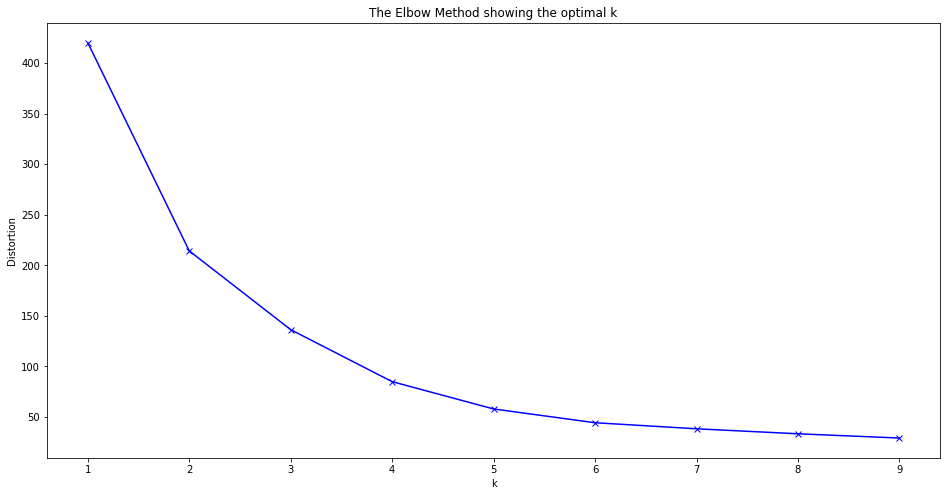

In [110]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(init="k-means++", n_clusters=k, n_init=12)
    kmeanModel.fit(cluster_dataset)
    distortions.append(kmeanModel.inertia_)

# Plot elbow method    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Choosed  k = 4 cluster


In [111]:
 kmeanModel = KMeans(init="k-means++", n_clusters=4, n_init=12)
 kmeanModel.fit(cluster_dataset)
 'Model fit successfully'

'Model fit successfully'

In [112]:
### Predicted
Cluster = kmeanModel.predict(cluster_dataset)

In [113]:
data["Cluster"] = Cluster
data.head(5)

,name,categories,address,lat,lng,Cluster
0,Hardware Société,Breakfast Spot,10 rue Lamarck,48.886901,2.344463,1
1,Le Myrha,Vegetarian / Vegan Restaurant,70 rue Myrha,48.886815,2.350892,1
2,Dôme de la Basilique du Sacré-Cœur,Scenic Lookout,Basilique du Sacré-Cœur,48.886809,2.343006,1
3,Babalou,Italian Restaurant,4 rue Lamarck,48.886490,2.344063,1
4,Comestibles & Marchand de Vins,Wine Bar,65 rue du Mont-Cenis,48.891257,2.343750,1


### Scatter plot

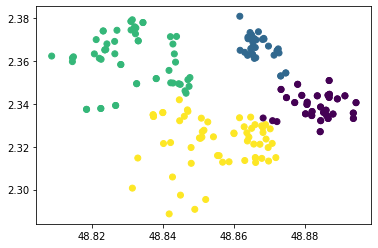

In [ ]:
plt.scatter(data.lat,data.lng,c = data.Cluster)


In [114]:
#data.groupby(["Cluster","categories"]).value_counts()
pd.options.display.max_rows = 200
data.groupby('Cluster')['categories'].apply(lambda x: x.value_counts())


Cluster                               
0        Vietnamese Restaurant            7
         Park                             6
         French Restaurant                4
         Italian Restaurant               3
         Lounge                           2
         Recording Studio                 2
         Multiplex                        2
         Mediterranean Restaurant         2
         Plaza                            2
         Coffee Shop                      2
         Hotel                            2
         Brazilian Restaurant             2
         Korean Restaurant                1
         Performing Arts Venue            1
         Restaurant                       1
         Botanical Garden                 1
         Café                             1
         Indie Movie Theater              1
         Bookstore                        1
         Science Museum                   1
         Cambodian Restaurant             1
         Thai Restaurant             

### Discussion 
If we explore more about this cluster, we can discover some interesting similarities within the cluster. For the group 3, we can see that it is more likely tourist place where you can visit some museum and know the art.
The group 0 and 2 we can infer that is more likely for people who can wants to eat in different restaurant, and to finish the group 1 that is more likely for places that 
